<a href="https://colab.research.google.com/github/CHIZIGWE/TSK/blob/main/Captify_Solution_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solution Notebook**

# **Data Preprocessing**

In [318]:
#Importing data wrangling and visualisation libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from numpy.ma.core import outer
from decimal import Decimal

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import  datetime as dt
from dateutil import relativedelta
pd.options.display.float_format = '{:.2f}'.format #To suppress scientific notation

In [319]:
#Loading the Datasets

Deal_Performance = pd.read_excel(r'/content/drive/MyDrive/Captify_Task/deal-performance-data.xlsx') #Deal Performanc Dataset

bid_blue = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-bluessp.csv") #Blue SSP dataset

bid_red = pd.read_csv(r"/content/drive/MyDrive/Captify_Task/deal-bid-data-redssp.csv") #Red SSP dataset

In [320]:
#Creating Function to Automate Sanity Check
def sanity_check(Dataset, Dataset_Name):
    print(Dataset_Name, 'Sanity Check: \n\n')
    print(f'{Dataset_Name} Rows and Columns: \n' ,Dataset.shape, '\n')
    print(f'{Dataset_Name} Column information: \n')
    Dataset.info()
    print('\n')
    print(f'{Dataset_Name} Missing information: \n',Dataset.isnull().sum(), '\n')
    print(f'{Dataset_Name} Statistical Summary: \n',Dataset.describe(), '\n')
    print(f'End of {Dataset_Name} sanity check \n')


In [321]:
#Sanity Check for Red SSP Data
sanity_check(bid_red, 'Bid Red')


Bid Red Sanity Check: 


Bid Red Rows and Columns: 
 (1132, 4) 

Bid Red Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      1132 non-null   object 
 1   month        1132 non-null   object 
 2   bid_request  1132 non-null   float64
 3   bids         1132 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 35.5+ KB


Bid Red Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Red Statistical Summary: 
           bid_request           bids
count         1132.00        1132.00
mean   95372278085.95  5870149054.87
std   110894431149.78  7107228982.18
min            160.00           0.00
25%            160.00           0.00
50%    55682516225.50  3144363396.00
75%   163250000000.00 10365478039.25
max   557000000000.00 44441690515.00 

En

In [322]:
#Sanity Check for Red SSP data
sanity_check(bid_blue, 'Bid Blue')

Bid Blue Sanity Check: 


Bid Blue Rows and Columns: 
 (748, 4) 

Bid Blue Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deal_id      748 non-null    object 
 1   month        748 non-null    object 
 2   bid_request  748 non-null    float64
 3   bids         748 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 23.5+ KB


Bid Blue Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Bid Blue Statistical Summary: 
           bid_request           bids
count          748.00         748.00
mean   83372563851.83  6156973885.02
std   104246600250.14  7556392469.17
min            160.00           0.00
25%            160.00           0.00
50%    34921890202.00  3133102090.00
75%   143500000000.00 10501080076.25
max   476000000000.00 37064307785.00 



The Datasets are mostly clean, however, in the bid datasets the date ('month') columns have the wrong datatypes. This has be changed for Data integrity purposes

In [323]:
#Converting both to datetime datatypes
bid_red['month'] = pd.to_datetime(bid_red['month'])
bid_blue['month'] = pd.to_datetime(bid_blue['month'])

#Checking that the change has taken place
bid_blue['month'].dtype
print('\n')
bid_red['month'].dtype

dtype('<M8[ns]')

To develop a full picture of the bid metrics, we concatenate both datasets

In [324]:
#Concatenating the bid Datasets
combined_bid = pd.concat([bid_blue, bid_red])

#Sanity Check on the Concatenated Dataset
sanity_check(combined_bid, 'Combined Bid')

Combined Bid Sanity Check: 


Combined Bid Rows and Columns: 
 (1880, 4) 

Combined Bid Column information: 

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 0 to 1131
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   deal_id      1880 non-null   object        
 1   month        1880 non-null   datetime64[ns]
 2   bid_request  1880 non-null   float64       
 3   bids         1880 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 73.4+ KB


Combined Bid Missing information: 
 deal_id        0
month          0
bid_request    0
bids           0
dtype: int64 

Combined Bid Statistical Summary: 
                                month     bid_request           bids
count                           1880         1880.00        1880.00
mean   2024-02-22 22:56:25.531914752  90597923699.18  5984268721.33
min              2024-01-01 00:00:00          160.00

Exploring the Deal Performance dataset to see opportunities for data manipulation and wrangling.

In [325]:
Deal_Performance.head()

,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52


Given that KPIs and their respecive values could form an integral part of the necessary analysis. The respective KPIs within the dataset should become variables alongside the existing variables.

In [326]:
#First we created a pivot based on the advertiser and the various KPIs
pivoted = Deal_Performance.pivot_table(index = 'advertiser', columns = 'kpi', values = 'kpi_value').reset_index()

#Then we Merge this Deal Performance dataframe
Deal_Performance = pd.merge(Deal_Performance, pivoted, how= 'inner', on= 'advertiser')

#The First 5 rows of the new dataframe
Deal_Performance.head()


,deal_id,deal_name,month,segment_type,ssp,advertiser,vertical,office,tier,media_type,kpi,kpi_value,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR
0,Deal_102,Deal_102_Campaign,2024-01-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.19,154.76,109.24,45.52,66474,50812.00,126.30,29.42,5.00,0.12,NaN
1,Deal_102,Deal_102_Campaign,2024-02-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,6.00,153.74,110.30,43.45,9900,12508.00,18.38,28.26,5.00,0.12,NaN
2,Deal_102,Deal_102_Campaign,2024-04-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,142.57,101.25,41.32,21614,1.00,21.61,28.98,5.00,0.12,NaN
3,Deal_102,Deal_102_Campaign,2024-05-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CPC,4.00,164.75,97.48,67.26,81433,1.00,24.37,40.83,5.00,0.12,NaN
4,Deal_102,Deal_102_Campaign,2024-06-01,Cookieless,BLUESSP,Advertiser_1,Jobs and Education,UK,Growth Tier,Display,CTR,0.10,172.89,101.11,71.78,89362,41537.00,89.36,41.52,5.00,0.12,NaN


Above we can see that the dataframe has successfully incorporated the KPIs as part of the variables. Now we can combine both variables to develop a bigger picture encompassing all three datasets.

In [327]:
Data = pd.merge(Deal_Performance, combined_bid, how= 'inner', on= 'deal_id')

#First five rows of new dataset

print(Data.head())

    deal_id          deal_name    month_x segment_type      ssp    advertiser            vertical office         tier media_type  kpi  kpi_value  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR  VTR    month_y     bid_request         bids
0  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN 2024-01-01          160.00  11418560961
1  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Display  CTR       0.19       154.76      109.24         45.52        66474         50812.00  126.30         29.42 5.00 0.12  NaN 2024-01-02          160.00   4218636088
2  Deal_102  Deal_102_Campaign 2024-01-01   Cookieless  BLUESSP  Advertiser_1  Jobs and Education     UK  Growth Tier    Displa

In [328]:
#Sanity Check for combined dataset

sanity_check(Data, 'Combined Dataset')

Combined Dataset Sanity Check: 


Combined Dataset Rows and Columns: 
 (15931, 25) 

Combined Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15931 entries, 0 to 15930
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   deal_id          15931 non-null  object        
 1   deal_name        15931 non-null  object        
 2   month_x          15931 non-null  datetime64[ns]
 3   segment_type     15931 non-null  object        
 4   ssp              15931 non-null  object        
 5   advertiser       15931 non-null  object        
 6   vertical         15931 non-null  object        
 7   office           15931 non-null  object        
 8   tier             15931 non-null  object        
 9   media_type       15931 non-null  object        
 10  kpi              15931 non-null  object        
 11  kpi_value        15931 non-null  float64       
 12  gross_spend      159

Most of the columns have no missing values.

However, given the fact that some of the advertisers do not use all forms of KPIs (CPC. CTR, VTR). There will be null values for some KPI measurements. We wil be rectifying this by imputing the number zero in place of the 'Nan' value.

We will also be dropping the additional 'month' column and renaming the sole 'month' column to date.

In [329]:
Data.fillna(0, inplace= True)
Data.rename(columns= {'month_x': 'Date'}, inplace= True)
Data.drop(columns= ['kpi', 'kpi_value'], inplace= True)

In [330]:
#Pre-Aggregation sanity check
sanity_check(Data, 'Combined Dataset')

Combined Dataset Sanity Check: 


Combined Dataset Rows and Columns: 
 (15931, 23) 

Combined Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15931 entries, 0 to 15930
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   deal_id          15931 non-null  object        
 1   deal_name        15931 non-null  object        
 2   Date             15931 non-null  datetime64[ns]
 3   segment_type     15931 non-null  object        
 4   ssp              15931 non-null  object        
 5   advertiser       15931 non-null  object        
 6   vertical         15931 non-null  object        
 7   office           15931 non-null  object        
 8   tier             15931 non-null  object        
 9   media_type       15931 non-null  object        
 10  gross_spend      15931 non-null  float64       
 11  media_cost       15931 non-null  float64       
 12  data_revenue     159

# Data Aggregation

Now we have successfully combined and cleaned the three datasets. It is time to construct an aggregated dataset that summarises the data of the various advertisers to conduct analysis and further investigations.

In [331]:
#Firstly we will create a calculated column to describe the bid success rate
Data['bid_success_rate'] = Data['bids']/Data['bid_request']
#Now we create an aggregated dataset
Data_Agg = Data.groupby(['advertiser']).agg({'segment_type': pd.Series.mode, 'vertical': pd.Series.mode, 'tier': pd.Series.mode, 'media_type': pd.Series.mode, 'Date':'max', 'gross_spend': 'sum', 'media_cost': 'sum',
                                           'data_revenue': 'median', 'impressions': 'mean', 'video_completes': 'median', 'clicks': 'sum', 'media_margin': 'mean', 'CPC': 'mean', 'CTR':'mean', 'VTR':'mean', 'bid_request': 'median', 'bids': 'median', 'bid_success_rate': 'median'})

Data_Agg.reset_index(inplace= True)

In [332]:
#First rows of new dataset
Data_Agg.head()


,advertiser,segment_type,vertical,tier,media_type,Date,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_request,bids,bid_success_rate
0,Advertiser_1,Cookieless,Jobs and Education,Growth Tier,Display,2024-12-01,12704.96,8471.19,55.03,43948.89,12508.00,3353.10,33.03,5.00,0.12,0.00,160.00,4218636088.00,0.03
1,Advertiser_10,Cookieless,Retail,Below Minimum Threshold,Video,2025-02-01,14934.18,7343.72,56.52,49735.16,5075.40,20731.67,42.38,4.00,0.26,77.99,81397251704.00,5555254606.00,0.05
2,Advertiser_100,Cookieless,Travel,Mid-Tier,Video,2025-02-01,6714.41,2745.45,21.50,69582.03,57760.00,12722.28,55.92,4.00,0.30,70.77,31149804220.00,4582959247.00,0.05
3,Advertiser_101,Cookieless,Alcohol,White Glove,Video,2025-02-01,169.35,92.47,0.40,32217.04,1.00,7631.20,47.99,4.00,0.31,75.00,43798978002.00,8964218772.00,0.06
4,Advertiser_102,Cookie,Style and Fashion,Below Minimum Threshold,Video,2024-12-01,60.16,35.20,0.70,38249.67,18884.10,2532.87,41.39,0.00,0.36,74.13,64000000080.00,6763498858.50,0.05


In [333]:
#Sanity Check
sanity_check(Data_Agg, 'Aggregated Dataset')

Aggregated Dataset Sanity Check: 


Aggregated Dataset Rows and Columns: 
 (181, 19) 

Aggregated Dataset Column information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   advertiser        181 non-null    object        
 1   segment_type      181 non-null    object        
 2   vertical          181 non-null    object        
 3   tier              181 non-null    object        
 4   media_type        181 non-null    object        
 5   Date              181 non-null    datetime64[ns]
 6   gross_spend       181 non-null    float64       
 7   media_cost        181 non-null    float64       
 8   data_revenue      181 non-null    float64       
 9   impressions       181 non-null    float64       
 10  video_completes   181 non-null    float64       
 11  clicks            181 non-null    float64       
 12  media_

There is no misssing data.

# Feature Engineering

Numerically and Categorically Classifying Churned customers

In [334]:
#Firstly, we create a variable called current time
current_time = dt.now()

#Then we create a column to stating the difference between today, and the last transaction

Data_Agg['months_since_last_transaction'] = round((current_time - Data_Agg['Date']).dt.days/30, 1)


#Given the business rule that customers with a most recent purchase date of more than 6 months are considered churned.

Data_Agg['churned'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 1, 0)

Data_Agg['churned_category'] = np.where(Data_Agg['months_since_last_transaction'] > 6, 'Churned', 'Active')
Data_Agg['churned'] = Data_Agg['churned'].astype('int')


Media Margin Classification:

Analysing the impact of media margin on the KPI can be enhanced by classifying the variable into four categories: 'Low', 'Medium', 'High', 'Very High' or 1, 2, 3, 4.

The classification is done by quartiles.

In [335]:
#Classifying the respective advertisers
Data_Agg['media_margin_category'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
Data_Agg['media_margin_category']= Data_Agg['media_margin_category'].astype('category')

#Providing an equivalent numerical classification
Data_Agg['media_margin_category_num'] = pd.qcut(Data_Agg['media_margin'], q=4, labels=[1, 2, 3, 4])

Creating a numerical representation for other features

In [336]:
#creating a numerical representation for tiers
Data_Agg['tier'] = Data_Agg['tier'].astype('category')
Data_Agg['growth_tier_num'] = Data_Agg['tier'].cat.codes


#Using ordinal ranking to provide numeric representation for segment type
Data_Agg['segment_type'] = Data_Agg['segment_type'].astype('string')
Data_Agg['segment_type'] = Data_Agg['segment_type'].astype('category')
Data_Agg['segment_type_num'] = Data_Agg['segment_type'].cat.codes


Data_Agg.head()

,advertiser,segment_type,vertical,tier,media_type,Date,gross_spend,media_cost,data_revenue,impressions,video_completes,clicks,media_margin,CPC,CTR,VTR,bid_request,bids,bid_success_rate,months_since_last_transaction,churned,churned_category,media_margin_category,media_margin_category_num,growth_tier_num,segment_type_num
0,Advertiser_1,Cookieless,Jobs and Education,Growth Tier,Display,2024-12-01,12704.96,8471.19,55.03,43948.89,12508.00,3353.10,33.03,5.00,0.12,0.00,160.00,4218636088.00,0.03,3.70,0,Active,Low,1,1,1
1,Advertiser_10,Cookieless,Retail,Below Minimum Threshold,Video,2025-02-01,14934.18,7343.72,56.52,49735.16,5075.40,20731.67,42.38,4.00,0.26,77.99,81397251704.00,5555254606.00,0.05,1.60,0,Active,Medium,2,0,1
2,Advertiser_100,Cookieless,Travel,Mid-Tier,Video,2025-02-01,6714.41,2745.45,21.50,69582.03,57760.00,12722.28,55.92,4.00,0.30,70.77,31149804220.00,4582959247.00,0.05,1.60,0,Active,Very High,4,2,1
3,Advertiser_101,Cookieless,Alcohol,White Glove,Video,2025-02-01,169.35,92.47,0.40,32217.04,1.00,7631.20,47.99,4.00,0.31,75.00,43798978002.00,8964218772.00,0.06,1.60,0,Active,High,3,3,1
4,Advertiser_102,Cookie,Style and Fashion,Below Minimum Threshold,Video,2024-12-01,60.16,35.20,0.70,38249.67,18884.10,2532.87,41.39,0.00,0.36,74.13,64000000080.00,6763498858.50,0.05,3.70,0,Active,Medium,2,0,0


In [337]:
#Gross spend per click

Data_Agg['Gross_Spend_Per_Click'] = Data_Agg['gross_spend']/Data_Agg['clicks']
Data_Agg.head()

Data_Agg['GSPC_Category'] = pd.qcut(Data_Agg['Gross_Spend_Per_Click'], q=4, labels= ['Low', 'Medium', 'High', 'Very High'], duplicates= 'drop')
c = pd.crosstab(Data_Agg['GSPC_Category'], Data_Agg['churned_category'], margins=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
GSPC_Category,,,,
Low,26,20,46,43.48
Medium,29,16,45,35.56
High,33,12,45,26.67
Very High,19,26,45,57.78
All,107,74,181,40.88


In [338]:
Data_Agg.columns

Index(['advertiser', 'segment_type', 'vertical', 'tier', 'media_type', 'Date', 'gross_spend', 'media_cost', 'data_revenue', 'impressions', 'video_completes', 'clicks', 'media_margin', 'CPC', 'CTR', 'VTR', 'bid_request', 'bids', 'bid_success_rate', 'months_since_last_transaction', 'churned', 'churned_category', 'media_margin_category', 'media_margin_category_num', 'growth_tier_num', 'segment_type_num', 'Gross_Spend_Per_Click', 'GSPC_Category'], dtype='object')

In [339]:
#Automating the creation of Histogram_Boxplot

def Histogram_Boxplots(dataset, variable, title, xlabel, Color1, Color2):
  fig, ax = plt.subplots(2, 1, sharex= False)

  sns.histplot(dataset[variable], ax= ax[0], color= Color1, bins = 6, kde= True)
  ax[0].set_title(title, fontsize= 15)
  ax[0].set_xlabel('')

  sns.boxplot(x= dataset[variable], ax= ax[1], color= Color2, showmeans = True)
  ax[1].set_xlabel(xlabel, fontsize= 10)
  plt.show()

#Automating the creation of countplot
def univariate_countplot(dataset, variable, title, xlabel, ylabel, Color1):
  sns.countplot(x= dataset[variable], palette= 'bright')
  plt.title(title, fontsize= 15)
  plt.xlabel(xlabel, fontsize= 10)
  plt.ylabel(ylabel, fontsize= 10)
  plt.show()

#Automating the creation of correlation plot
def correlation_plot(dataset, title, variable1, variable2, Color):
  sns.regplot(x= dataset[variable1], y= dataset[variable2], color= Color)
  plt.title(title, fontsize= 15)

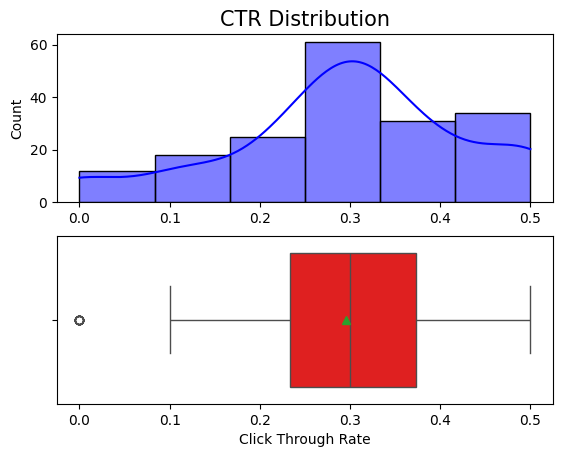

In [340]:
#CTR distribution
Histogram_Boxplots(Data_Agg, 'CTR', 'CTR Distribution', 'Click Through Rate', 'blue', 'red')

In [341]:
#Bid success distribution

In [342]:
#Margin_Cost_Distribution

<ipython-input-339-977a75a63b0d>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= dataset[variable], palette= 'bright')


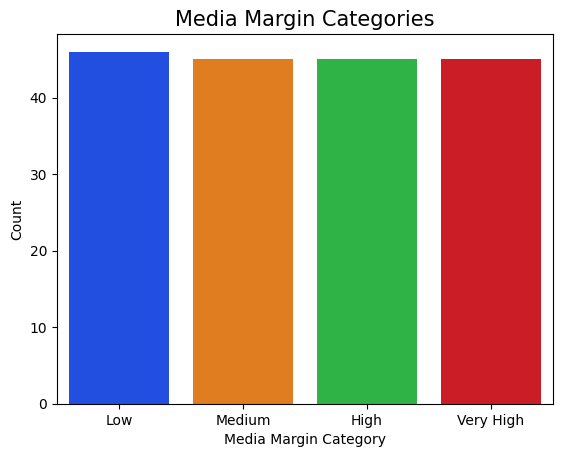

In [343]:
#Media_Margin Categories
univariate_countplot(Data_Agg, 'media_margin_category', 'Media Margin Categories', 'Media Margin Category', 'Count', 'blue')

In [365]:
ct = pd.crosstab(Data_Agg['media_margin_category'], Data_Agg['churned_category'], margins = True)

ct['churned_rate (%)'] = (ct['Churned']/ct['All']) * 100
ct

#ct['s'] = (ct['media_margin_category']/ct['All']) * 100


churned_category,Active,Churned,All,churned_rate (%)
media_margin_category,,,,
Low,20,26,46,56.52
Medium,30,15,45,33.33
High,27,18,45,40.00
Very High,30,15,45,33.33
All,107,74,181,40.88


Despite the Media Margin category fairly equal in terms population. The lowest quartile is an outlier in terms of performance.

It has a churn rate of over 50%. This is 10 percentage above the average churn rate and consequently may suggest that the Captify's least profitable customer are potentially the most likely to leave.

In [348]:
Data_Agg['CTR_cat'] = pd.qcut(Data_Agg['CTR'], q=4, labels= ['Low', 'Medium', 'High', 'Very High'], duplicates= 'drop')
# The duplicates='drop' argument tells pd.qcut to drop duplicate bin edges
# This ensures that the resulting categories are still meaningful and avoids the ValueError.

c = pd.crosstab(Data_Agg['CTR_cat'], Data_Agg['churned_category'], margins=True, dropna=True)

c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
CTR_cat,,,,
Low,23,26,49,53.06
Medium,30,14,44,31.82
High,34,9,43,20.93
Very High,20,25,45,55.56
All,107,74,181,40.88


Using Correlation plot to evaluate the relation of correlation between Media Margin

In [349]:
#cross tab vtr and churn

Data_Agg['VTR_cat'] = pd.qcut(Data_Agg['VTR'], q=4, labels= ['Low', 'Medium', 'High'], duplicates= 'drop')

c =pd.crosstab(Data_Agg['VTR_cat'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c
#

churned_category,Active,Churned,All,churned_rate (%)
VTR_cat,,,,
Low,47,49,96,51.04
Medium,30,10,40,25.00
High,30,15,45,33.33
All,107,74,181,40.88


In [350]:
Data_Agg['vertical']= Data_Agg['vertical'].astype('string')
c =pd.crosstab(Data_Agg['vertical'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
vertical,,,,
Alcohol,6,5,11,45.45
Automotive,5,5,10,50.00
Charity,9,5,14,35.71
Finance,5,7,12,58.33
Food and Drink,5,5,10,50.00
Gambling,7,6,13,46.15
Home and Garden,3,6,9,66.67
Jobs and Education,5,6,11,54.55
Law and Government,12,8,20,40.00


In [351]:
c =pd.crosstab(Data_Agg['vertical'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
vertical,,,,
Alcohol,6,5,11,45.45
Automotive,5,5,10,50.00
Charity,9,5,14,35.71
Finance,5,7,12,58.33
Food and Drink,5,5,10,50.00
Gambling,7,6,13,46.15
Home and Garden,3,6,9,66.67
Jobs and Education,5,6,11,54.55
Law and Government,12,8,20,40.00


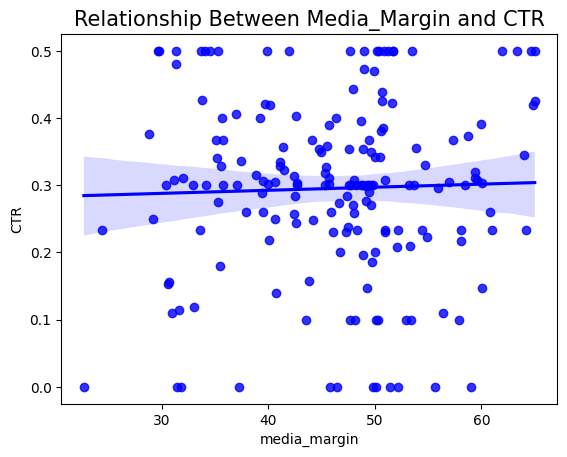

In [345]:
correlation_plot(Data_Agg, 'Relationship Between Media_Margin and CTR', 'media_margin', 'CTR', 'blue')

The relationship here is a t best almost non-existent. This refutes the initial hypotheses that the media margin has an impact on CTR.

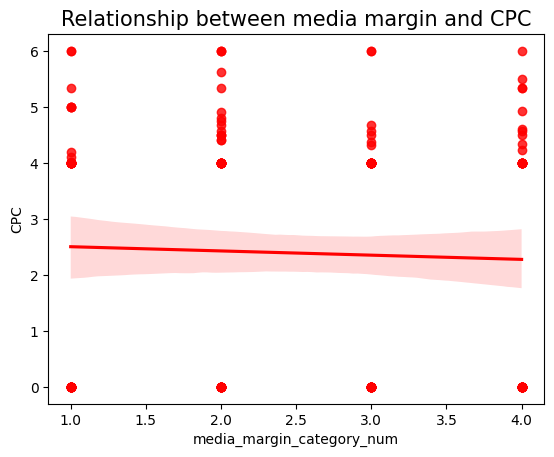

In [346]:
correlation_plot(Data_Agg, 'Relationship between media margin and CPC', 'media_margin_category_num', 'CPC', 'red' )

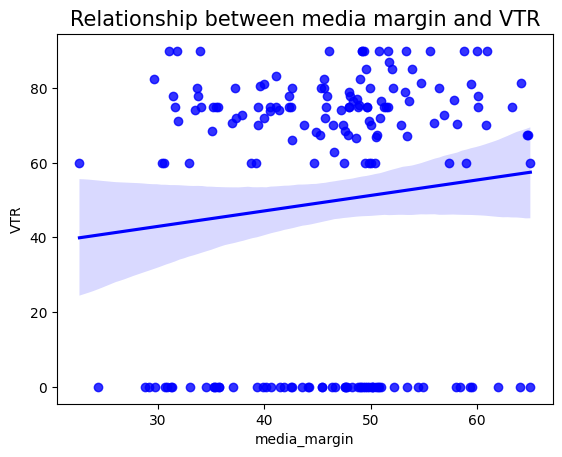

In [347]:
correlation_plot(Data_Agg, 'Relationship between media margin and VTR', 'media_margin', 'VTR', 'blue')

In [352]:
c =pd.crosstab(Data_Agg['tier'], Data_Agg['churned_category'], margins=True, dropna=True)
c['churned_rate (%)'] = (c['Churned']/c['All']) * 100
c

churned_category,Active,Churned,All,churned_rate (%)
tier,,,,
Below Minimum Threshold,36,31,67,46.27
Growth Tier,30,22,52,42.31
Mid-Tier,28,13,41,31.71
White Glove,13,8,21,38.10
All,107,74,181,40.88


In [353]:
control = Data_Agg[Data_Agg['churned_category'] == 'Active']
treatment = Data_Agg[Data_Agg['churned_category'] == 'Churned']

t1 = treatment[treatment['media_margin_category_num']== 4]

print(t1)

         advertiser segment_type            vertical                     tier media_type       Date  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR   VTR     bid_request           bids  bid_success_rate  months_since_last_transaction  churned churned_category media_margin_category media_margin_category_num  growth_tier_num  segment_type_num  Gross_Spend_Per_Click GSPC_Category    CTR_cat VTR_cat
12    Advertiser_11   Cookieless             Alcohol              White Glove      Video 2024-08-01       802.57      378.01         26.62     85236.00          8233.10 2107.76         52.89 0.00 0.10 70.00          160.00 13941227499.50       87132671.87                           7.80        1          Churned             Very High                         4                3                 1                   0.38        Medium        Low     Low
30   Advertiser_126       Cookie  Jobs and Education              Growth Tier      Video 2024-09

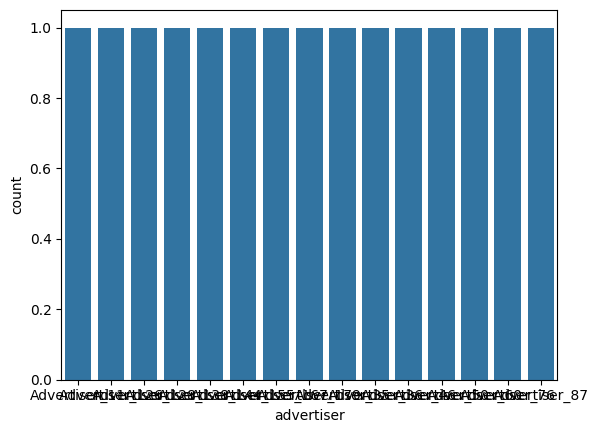

<Figure size 2000x10000 with 0 Axes>

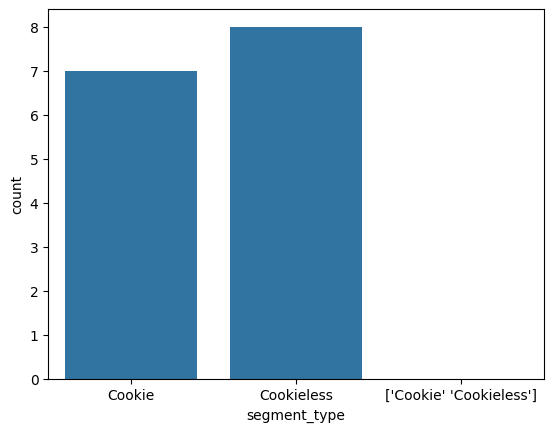

<Figure size 2000x10000 with 0 Axes>

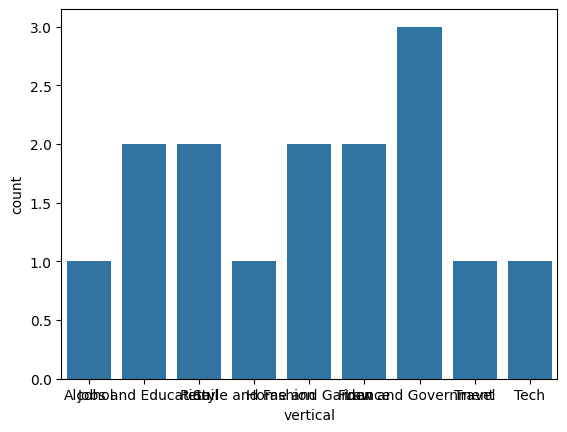

<Figure size 2000x10000 with 0 Axes>

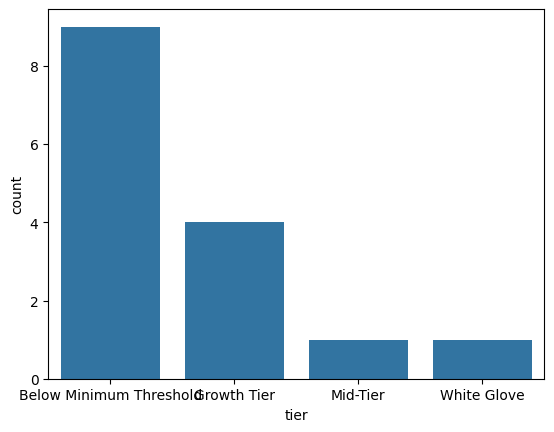

<Figure size 2000x10000 with 0 Axes>

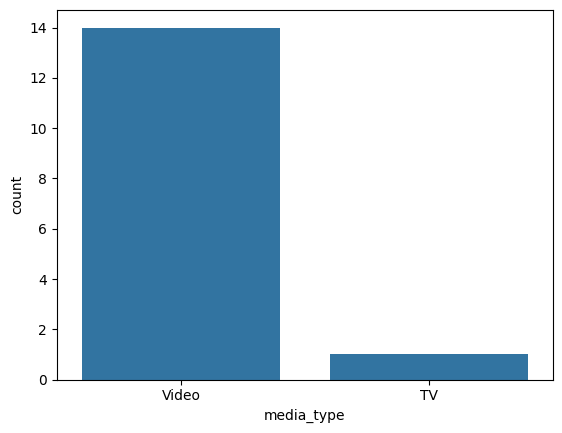

<Figure size 2000x10000 with 0 Axes>

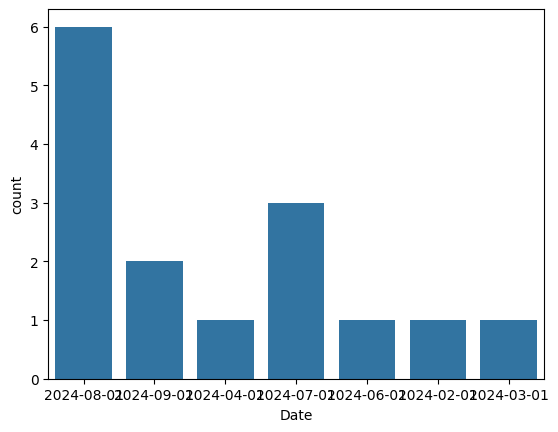

<Figure size 2000x10000 with 0 Axes>

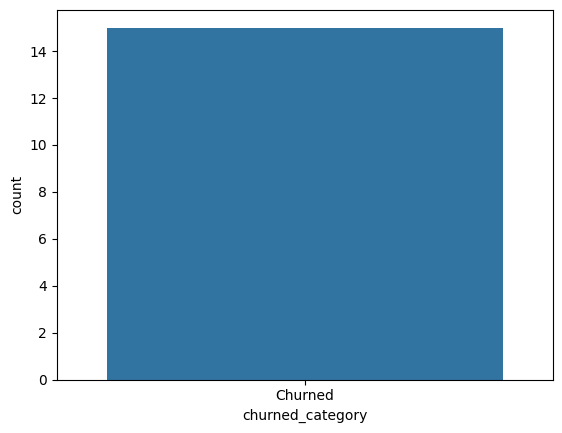

<Figure size 2000x10000 with 0 Axes>

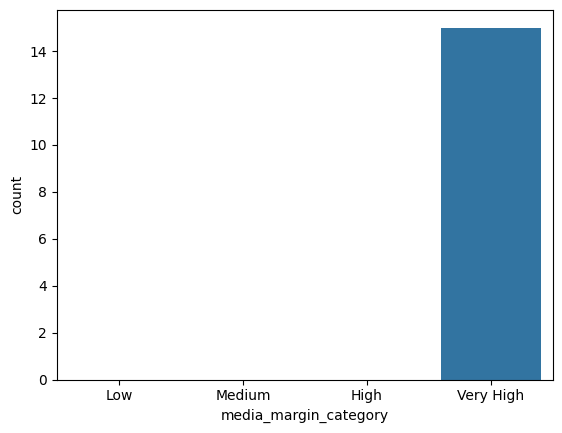

<Figure size 2000x10000 with 0 Axes>

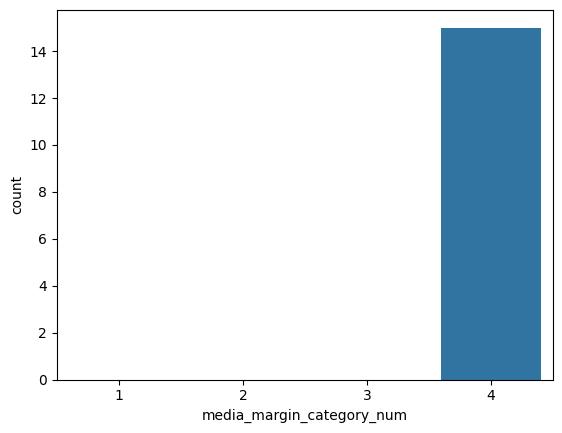

<Figure size 2000x10000 with 0 Axes>

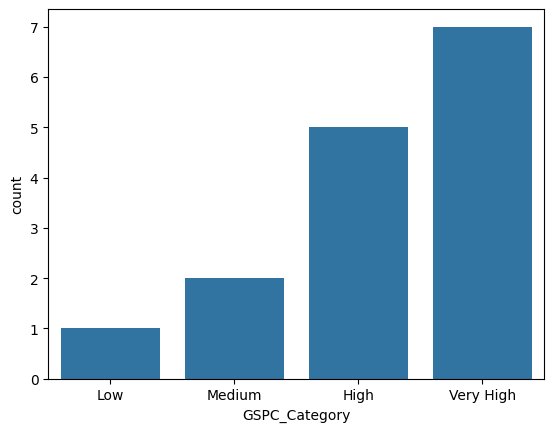

<Figure size 2000x10000 with 0 Axes>

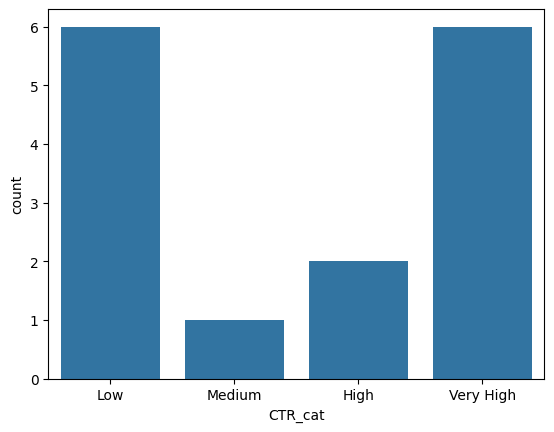

<Figure size 2000x10000 with 0 Axes>

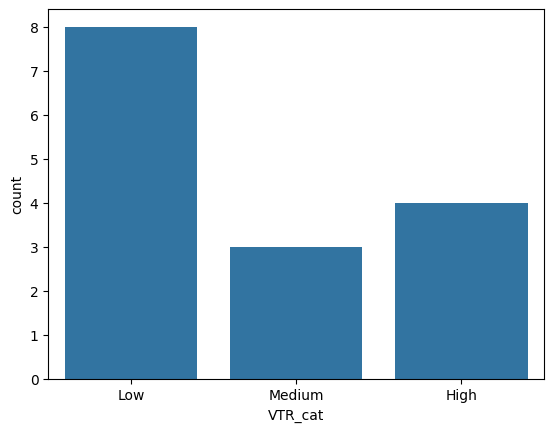

<Figure size 2000x10000 with 0 Axes>

In [354]:
colo = t1.select_dtypes(exclude = np.number)

for col in colo:
  sns.countplot(x= colo[col])
  plt.figure(figsize=(20,100))
  plt.show()

         advertiser segment_type            vertical                     tier media_type       Date  gross_spend  media_cost  data_revenue  impressions  video_completes  clicks  media_margin  CPC  CTR   VTR     bid_request           bids  bid_success_rate  months_since_last_transaction  churned churned_category media_margin_category media_margin_category_num  growth_tier_num  segment_type_num  Gross_Spend_Per_Click GSPC_Category    CTR_cat VTR_cat
9    Advertiser_107   Cookieless      Food and Drink              Growth Tier    Display 2024-07-01      1166.25      818.67         86.90     70209.00         18339.50  811.35         29.18 4.00 0.25  0.00  25206208560.00  1181148885.00              0.02                           8.80        1          Churned                   Low                         1                1                 1                   1.44          High     Medium     Low
10   Advertiser_108       Cookie             Finance  Below Minimum Threshold      Video 2024-08

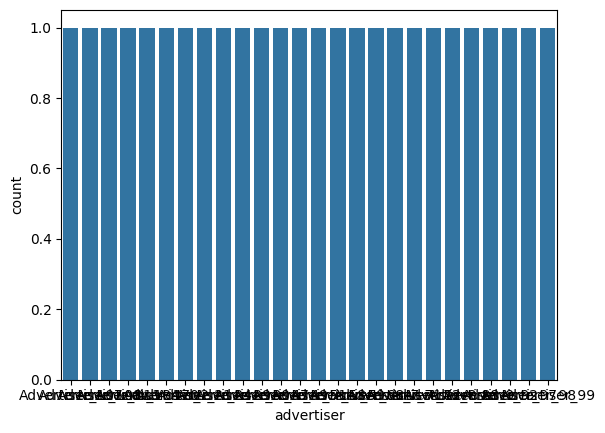

<Figure size 2000x10000 with 0 Axes>

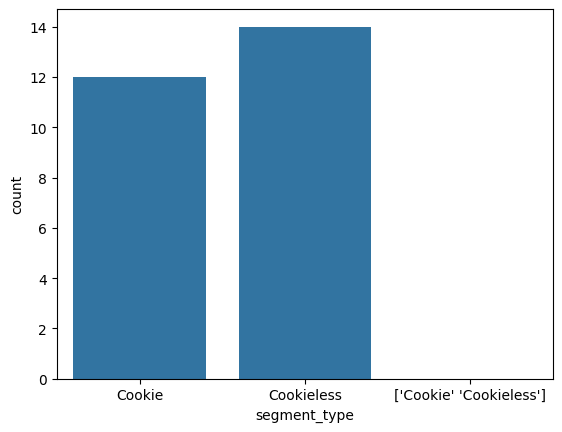

<Figure size 2000x10000 with 0 Axes>

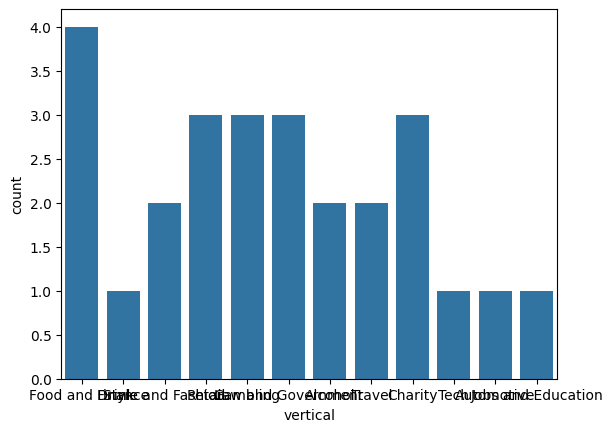

<Figure size 2000x10000 with 0 Axes>

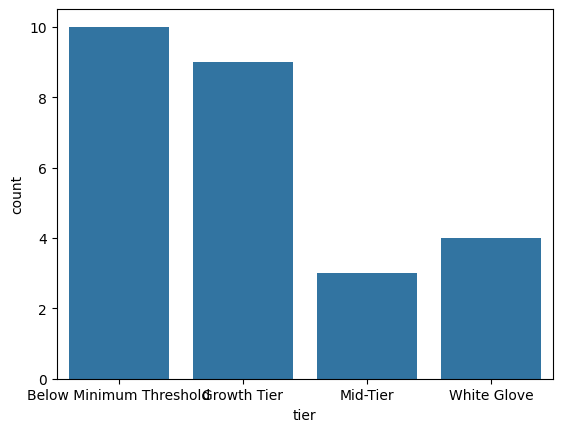

<Figure size 2000x10000 with 0 Axes>

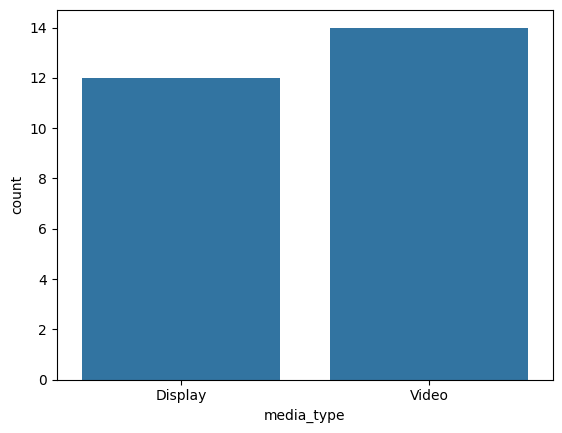

<Figure size 2000x10000 with 0 Axes>

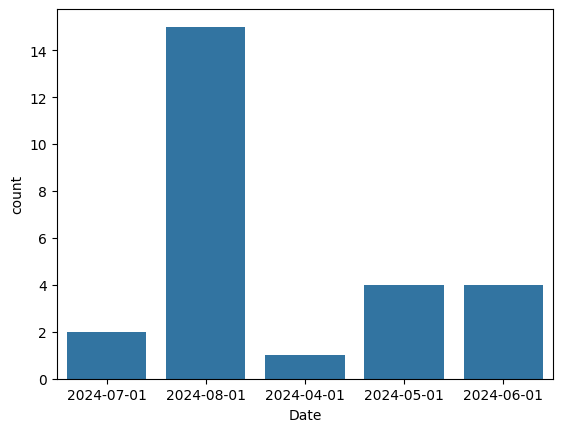

<Figure size 2000x10000 with 0 Axes>

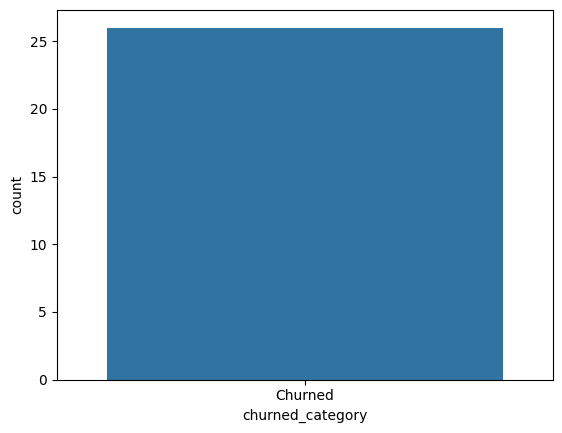

<Figure size 2000x10000 with 0 Axes>

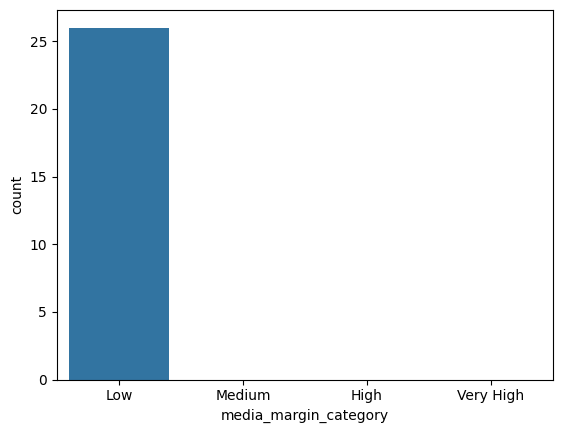

<Figure size 2000x10000 with 0 Axes>

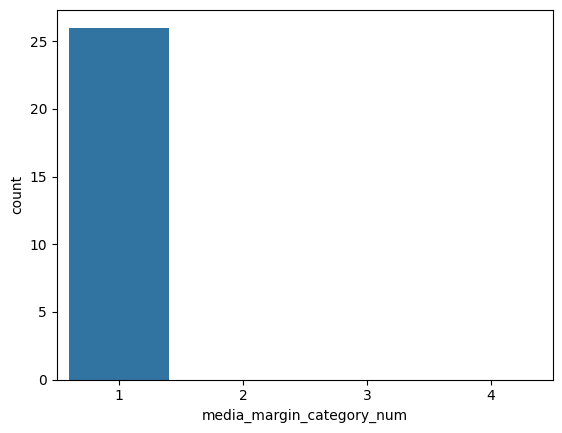

<Figure size 2000x10000 with 0 Axes>

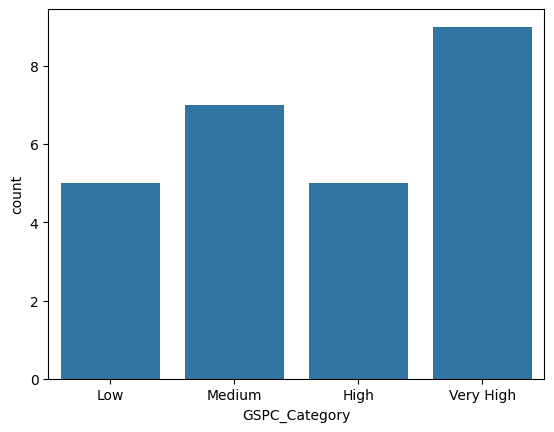

<Figure size 2000x10000 with 0 Axes>

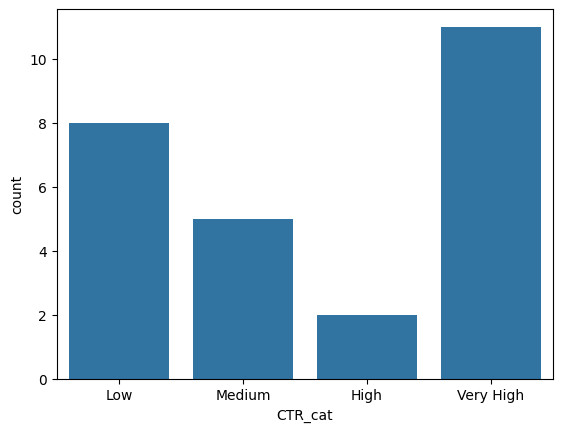

<Figure size 2000x10000 with 0 Axes>

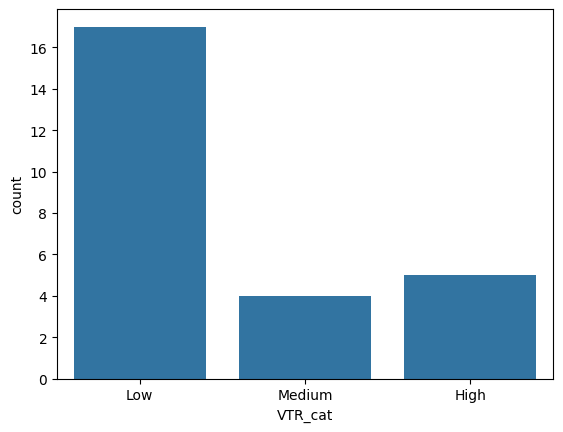

<Figure size 2000x10000 with 0 Axes>

In [355]:
t3 = treatment[treatment['media_margin_category_num']== 3]

t1 = treatment[treatment['media_margin_category_num']== 1]

print(t1)

colo = t1.select_dtypes(exclude = np.number)

for col in colo:
  sns.countplot(x= t1[col])
  plt.figure(figsize=(20,100))
  plt.show()

#t2 = treatment[treatment['media_margin_category_num']== 1]


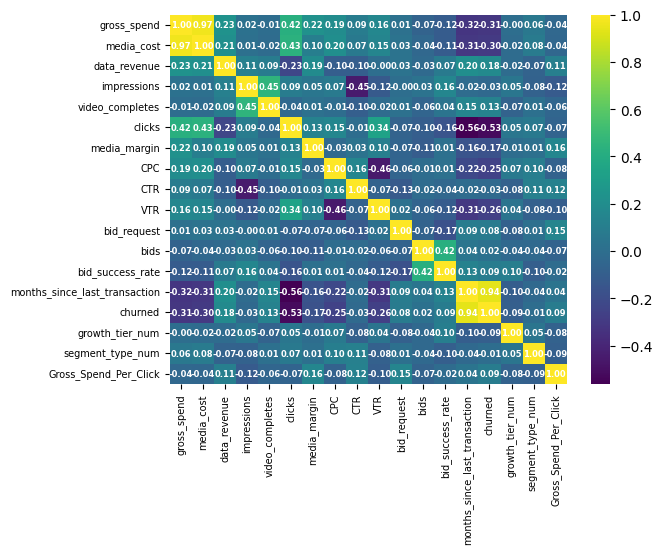

<Figure size 20000x10000 with 0 Axes>

In [375]:
NUM_DATA = Data_Agg.select_dtypes(include = np.number)
sns.heatmap(NUM_DATA.corr(), annot= True, cmap= 'viridis', fmt= '.2f', annot_kws= {'color': 'white', 'fontsize': 6, 'fontweight': 'bold'})
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.figure(figsize=(200,100))
plt.show()


This heatmap depicts the relationship between media_margin and the various metric such as CPC, CTR and VTR

USING ANOVA to evaluate the impact of Media Margin on the KPIs

In [357]:
#import the necessart library

!pip install pingouin
import pingouin as pg

In [358]:
#Automating ANOVA tests

import pingouin as pg

def ANOVA(dataset, dependent_variable, independent_variable):
  aov = pg.anova(dv= dependent_variable, between= independent_variable, data= dataset, detailed= True)
  print('Analysis of Variance \n', aov, '\n')

  #pairwise analysis
  pt = pg.pairwise_tukey(dv= dependent_variable, between= independent_variable, data= dataset)
  print('Pairwise Analysis \n', pt, '\n')

In [359]:
#Testing whether media_margin_category has a statistically significant impact on CTR

ANOVA(Data_Agg, 'CTR', 'media_margin_category')

Analysis of Variance 
                   Source   SS   DF   MS    F  p-unc  np2
0  media_margin_category 0.01    3 0.00 0.23   0.87 0.00
1                 Within 3.12  177 0.02  NaN    NaN  NaN 

Pairwise Analysis 
         A          B  mean(A)  mean(B)  diff   se     T  p-tukey  hedges
0     Low     Medium     0.30     0.29  0.02 0.03  0.71     0.89    0.15
1     Low       High     0.30     0.30  0.00 0.03  0.12     1.00    0.02
2     Low  Very High     0.30     0.29  0.02 0.03  0.56     0.94    0.11
3  Medium       High     0.29     0.30 -0.02 0.03 -0.59     0.93   -0.14
4  Medium  Very High     0.29     0.29 -0.00 0.03 -0.15     1.00   -0.03
5    High  Very High     0.30     0.29  0.01 0.03  0.44     0.97    0.09 



In [360]:
#Testing whether media margin has a statistically signifcant impact on VTR

ANOVA(Data_Agg, 'VTR', 'media_margin_category')

Analysis of Variance 
                   Source        SS   DF      MS    F  p-unc  np2
0  media_margin_category   4762.28    3 1587.43 1.22   0.30 0.02
1                 Within 230823.83  177 1304.09  NaN    NaN  NaN 

Pairwise Analysis 
         A          B  mean(A)  mean(B)   diff   se     T  p-tukey  hedges
0     Low     Medium    44.75    47.50  -2.75 7.57 -0.36     0.98   -0.07
1     Low       High    44.75    48.16  -3.41 7.57 -0.45     0.97   -0.09
2     Low  Very High    44.75    58.28 -13.53 7.57 -1.79     0.28   -0.38
3  Medium       High    47.50    48.16  -0.66 7.61 -0.09     1.00   -0.02
4  Medium  Very High    47.50    58.28 -10.78 7.61 -1.42     0.49   -0.30
5    High  Very High    48.16    58.28 -10.12 7.61 -1.33     0.55   -0.28 



In [361]:
#Testing whether Media Margin has a statistically significant impact on bid_sucess
ANOVA(Data_Agg, 'bid_success_rate', 'media_margin_category')

Analysis of Variance 
                   Source                   SS   DF                 MS    F  p-unc  np2
0  media_margin_category    33249557499424.77    3  11083185833141.59 0.07   0.97 0.00
1                 Within 26693676790193252.00  177 150811733277927.97  NaN    NaN  NaN 

Pairwise Analysis 
         A          B    mean(A)    mean(B)        diff         se     T  p-tukey  hedges
0     Low     Medium 3051710.32 2283334.22   768376.10 2574856.85  0.30     0.99    0.08
1     Low       High 3051710.32 2788361.09   263349.23 2574856.85  0.10     1.00    0.02
2     Low  Very High 3051710.32 3467995.10  -416284.78 2574856.85 -0.16     1.00   -0.03
3  Medium       High 2283334.22 2788361.09  -505026.87 2588965.76 -0.20     1.00   -0.04
4  Medium  Very High 2283334.22 3467995.10 -1184660.88 2588965.76 -0.46     0.97   -0.09
5    High  Very High 2788361.09 3467995.10  -679634.01 2588965.76 -0.26     0.99   -0.05 



Based on the p - value (Threshold for statistical significance) for all three tests. Media margin does not have statistically signifcant impact on the

In [362]:
ANOVA(Data_Agg, 'CTR', 'segment_type_num')

Analysis of Variance 
              Source   SS   DF   MS    F  p-unc  np2
0  segment_type_num 0.04    2 0.02 1.13   0.33 0.01
1            Within 3.09  178 0.02  NaN    NaN  NaN 

Pairwise Analysis 
    A  B  mean(A)  mean(B)  diff   se     T  p-tukey                 hedges
0  0  1     0.28     0.31 -0.03 0.02 -1.43     0.33                  -0.22
1  0  2     0.28     0.35 -0.08 0.13 -0.58     0.83  [-0.5644939308574666]
2  1  2     0.31     0.35 -0.05 0.13 -0.36     0.93   [-0.372995187992925] 



In [363]:
ANOVA(Data_Agg, 'CTR', 'growth_tier_num')

Analysis of Variance 
             Source   SS   DF   MS    F  p-unc  np2
0  growth_tier_num 0.03    3 0.01 0.64   0.59 0.01
1           Within 3.09  177 0.02  NaN    NaN  NaN 

Pairwise Analysis 
    A  B  mean(A)  mean(B)  diff   se     T  p-tukey  hedges
0  0  1     0.31     0.28  0.03 0.02  1.14     0.66    0.21
1  0  2     0.31     0.28  0.03 0.03  1.15     0.66    0.22
2  0  3     0.31     0.29  0.02 0.03  0.73     0.88    0.19
3  1  2     0.28     0.28  0.00 0.03  0.08     1.00    0.02
4  1  3     0.28     0.29 -0.00 0.03 -0.11     1.00   -0.03
5  2  3     0.28     0.29 -0.01 0.04 -0.17     1.00   -0.04 



Regression Analysis - Finding out what drives the KPIs

In [364]:
def MLR(dataset, target_variable):


SyntaxError: incomplete input (<ipython-input-364-fff7752b7337>, line 2)

ML model - Finding out what put the KPI above average